In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Snippet for the use of relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd

from sklearn.model_selection import train_test_split

from src.data.make_dataset import X_raw, Y
from src.visualization.visualize import plot_model_results

In [3]:
seed = 42
np.random.seed(seed)
rnd.seed(seed)

# Deep Learning (part.2)

## Convolutional Neural Networks

### Preprocessing

We basically split the data into train and validation sets, then we can normalize to fit the interval \[0, 1\]

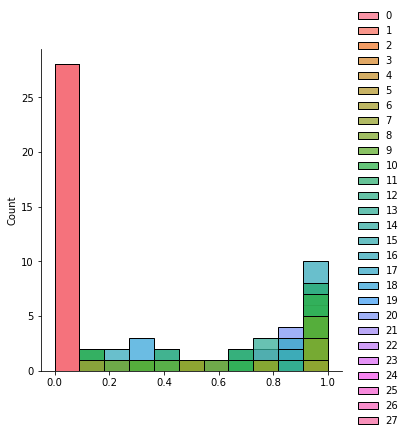

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, Y, test_size=0.2, shuffle=True, random_state=seed)
# Preprocessing
X_train = tf.cast(X_train, tf.float32) / 255.0
X_test = tf.cast(X_test, tf.float32) / 255.0

sns.displot(np.array(X_train)[0])

In [23]:
# Expand the dimensions of the images to feed the CNN
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train.shape, X_test.shape

(TensorShape([56000, 28, 28, 1]), TensorShape([14000, 28, 28, 1]))

### Single Convolutional Block Network

In [17]:
model = models.Sequential()

# CONV layer w/ 8 Filters of size (2 ,2) / Stride of 1 / Padding that keeps input size / Activation RELU -> Common values
model.add(layers.Conv2D(8, (2, 2), input_shape=(28, 28, 1), activation='relu', padding='same')) 
# POOL layer w/ Spatial Extent of 2 / Strides of 2 -> Common values
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten the tensor to feed the FC Layers
model.add(layers.Flatten())
# FC layer w/ 
model.add(layers.Dense(15))
# Output layer w/ 10 classes
model.add(layers.Dense(10))


In [18]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 15)                23535     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 23,735
Trainable params: 23,735
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [26]:
n_epochs = 20
batch_size = 32

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 17s 303us/sample - loss: 0.3409 - accuracy: 0.9030 - val_loss: 0.1968 - val_accuracy: 0.9436
Epoch 2/20
56000/56000 [==============================] - 16s 291us/sample - loss: 0.1477 - accuracy: 0.9577 - val_loss: 0.1446 - val_accuracy: 0.9553
Epoch 3/20
56000/56000 [==============================] - 13s 228us/sample - loss: 0.1061 - accuracy: 0.9686 - val_loss: 0.1008 - val_accuracy: 0.9697
Epoch 4/20
56000/56000 [==============================] - 16s 289us/sample - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.0909 - val_accuracy: 0.9736
Epoch 5/20
56000/56000 [==============================] - 19s 333us/sample - loss: 0.0747 - accuracy: 0.9777 - val_loss: 0.0846 - val_accuracy: 0.9746
Epoch 6/20
56000/56000 [==============================] - 15s 268us/sample - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch 7/20
56000/56000 [====================

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.3f}')

14000/1 - 2s - loss: 0.3408 - accuracy: 0.9752
Test accuracy : 0.975


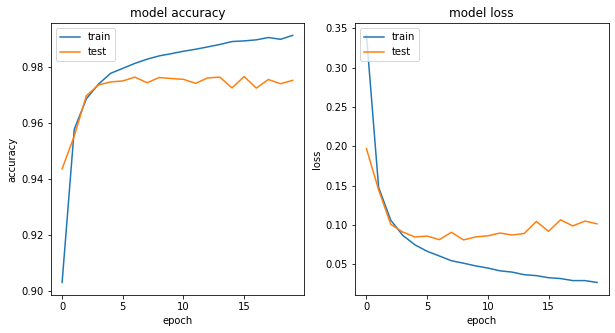

In [28]:
plot_model_results(history)

### Fine tuning the basic model 

We basically add more filters as we can clearly see that 8 is not enough, we also boost their size to make the features extracted a little bit more relevant
We forgot the softmax activation on the last layer which is important as it is a multiclass classification problem

In [30]:
model = models.Sequential()

# CONV layer w/ 24 Filters of size (5 ,5) / Stride of 1 / Padding that keeps input size / Activation RELU 
model.add(layers.Conv2D(24, (5, 5), input_shape=(28, 28, 1), activation='relu', padding='same')) 
# POOL layer w/ Spatial Extent of 2 / Strides of 2 -> Common values
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten the tensor to feed the FC Layers
model.add(layers.Flatten())
# FC layer w/ 30 hidden units
model.add(layers.Dense(30, activation='relu'))
# Output layer w/ 10 classes and softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [32]:
n_epochs = 20
batch_size = 32

history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_test, y_test), batch_size=batch_size)

Train on 56000 samples, validate on 14000 samples
Epoch 1/20
56000/56000 [==============================] - 29s 526us/sample - loss: 1.6333 - accuracy: 0.8331 - val_loss: 1.5956 - val_accuracy: 0.8676
Epoch 2/20
56000/56000 [==============================] - 29s 514us/sample - loss: 1.5827 - accuracy: 0.8789 - val_loss: 1.5823 - val_accuracy: 0.8792
Epoch 3/20
56000/56000 [==============================] - 28s 503us/sample - loss: 1.5752 - accuracy: 0.8856 - val_loss: 1.5789 - val_accuracy: 0.8818
Epoch 4/20
56000/56000 [==============================] - 30s 528us/sample - loss: 1.5713 - accuracy: 0.8889 - val_loss: 1.5780 - val_accuracy: 0.8815
Epoch 5/20
56000/56000 [==============================] - 30s 542us/sample - loss: 1.4874 - accuracy: 0.9752 - val_loss: 1.4826 - val_accuracy: 0.9796
Epoch 6/20
56000/56000 [==============================] - 30s 542us/sample - loss: 1.4766 - accuracy: 0.9854 - val_loss: 1.4801 - val_accuracy: 0.9815
Epoch 7/20
56000/56000 [====================

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'Test accuracy : {test_acc:.3f}')

14000/1 - 3s - loss: 1.4684 - accuracy: 0.9858
Test accuracy : 0.986


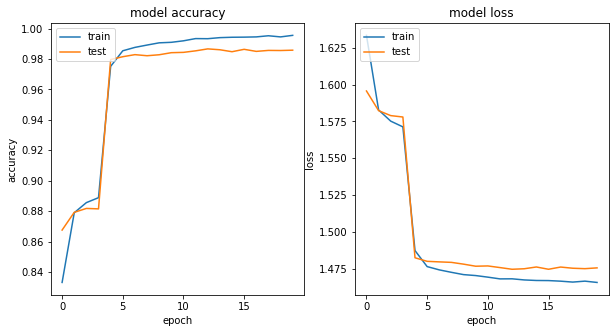

In [34]:
plot_model_results(history)